In [1]:
import numpy as np
import pandas as pd

In [2]:
# Pandas Option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

# matplotlib 기본 글꼴 관련 설정
plt.rc( 'font', size=14 )
plt.rc( 'axes', labelsize=14, titlesize=14 )
plt.rc( 'legend', fontsize=14 )
plt.rc( 'xtick', labelsize=10 )
plt.rc( 'ytick', labelsize=10 )

In [77]:
# matplotlib 한글 출력을 위한 설정
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [7]:
# 경고 문자 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [8]:
# Tensorflow import 및 버전 확인
import tensorflow as tf

2024-09-10 05:16:01.078236: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 05:16:01.097599: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 05:16:01.136266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 05:16:01.186785: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 05:16:01.201077: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 05:16:01.251519: I tensorflow/core/platform/cpu_feature_gu

In [9]:
# Tensorflow 필요한 클래스/함수 import
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers

# Scikit-learn 데이터 분리 함수 import
from sklearn.model_selection import train_test_split

# 이진 분류 모델( Logistic Regression )

## 0. 데이터 준비

In [10]:
# 점수
X = np.array( [ -50, -40, -30, -20, -10, -5, 0,
                5, 10, 20, 30, 40, 50 ] )

# 합격(1, 양성)/불합격(0, 음성) 유무
y = np.array( [ 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1 ] )

# print( f'X.shape : {X.shape}' )
print( f'y.shape : {y.shape}' )

## 1. 데이터 분석

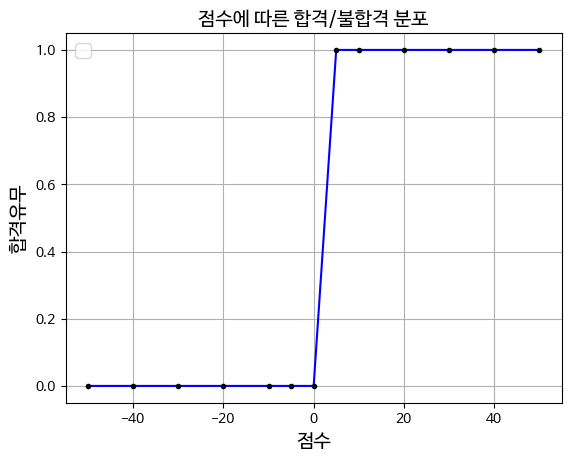

In [12]:
plt.plot( X, y, 'b', X, y, 'k.' )

plt.title( '점수에 따른 합격/불합격 분포' )
plt.xlabel( '점수' )
plt.ylabel( '합격유무' )
plt.legend()
plt.grid()

plt.show()

### *데이터 분리

In [16]:
# train_test_split() 함수 : 데이터를 훈련/테스트용으로 분리, scikit-learn 패키지에 포함
#    X : 입력 데이터
#    y : Label
#    test_size : 테스트 데이터 비율
#    random_state : 재현성을 위한 random state 값
#    데이터를 섞어서 분리한다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [17]:
print( f'X_train.shape : {X_train.shape}' )
print( f'y_train.shape : {y_train.shape}\n' )
print( f'X_test.shape : {X_test.shape}' )
print( f'y_test.shape : {y_test.shape}' )

X_train.shape : (10,)
y_train.shape : (10,)

X_test.shape : (3,)
y_test.shape : (3,)


In [18]:
print( f'X_train : {X_train}\ty_train : {y_train}' )
print( f'X_test : {X_test}\ty_test : {y_test}' )

X_train : [ 10  -5 -30 -40  50 -10   5  30 -20   0]	y_train : [1 0 0 0 1 0 1 1 0 0]
X_test : [ 40  20 -50]	y_test : [1 1 0]


## 2. 모델링

In [23]:
model = Sequential()
model.add( Input( shape = ( 1, ), name = 'Input' ) ) # 입력 데이터 변수 개수
model.add( Dense( 1, activation = 'sigmoid', name = 'Output' ) ) # 출력

In [24]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일

In [27]:
sgd = optimizers.SGD()

model.compile( loss = 'binary_crossentropy',
               optimizer = sgd,
               metrics = [ 'binary_accuracy' ] )

## 4. 훈련

In [28]:
# X_train : 훈련 입력 데이터
# y_train : 훈련 Label
# epochs=300 : 훈련 횟수
# batch_size = 1 : 매개 변수 변경 단위
# validation_split = 0.2 : 훈련 검증 데이터 비율
history = model.fit( X_train, y_train, epochs = 300,
                     batch_size = 1,
                     validation_split = 0.2 )

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 1.0000 - loss: 0.0918 - val_binary_accuracy: 0.5000 - val_loss: 0.3526
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.1140 - val_binary_accuracy: 1.0000 - val_loss: 0.3491
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0768 - val_binary_accuracy: 1.0000 - val_loss: 0.3478
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0403 - val_binary_accuracy: 1.0000 - val_loss: 0.3473
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 1.0000 - loss: 0.0364 - val_binary_accuracy: 1.0000 - val_loss: 0.3470
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 1.0000 - loss: 0.0721 - val_binary_accuracy: 1.0000 - val_loss: 0.3468
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 1.0000 - loss: 0.0231 - val_binary_accuracy: 1.0000 - val_loss: 0.3467
Epoch 8/300
8/8 ━━━━━━━━━━

### *훈련 과정 확인

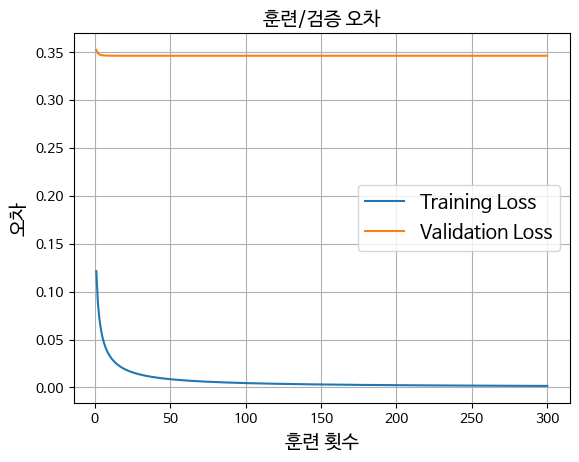

In [29]:
loss = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]
epochs = range( 1, len( loss ) + 1 )

plt.plot( epochs, loss, label = 'Training Loss' )
plt.plot( epochs, val_loss, label = 'Validation Loss' )
plt.title( '훈련/검증 오차' )
plt.xlabel( '훈련 횟수' )
plt.ylabel( '오차' )
plt.legend()
plt.grid()

plt.show()

## 5. 평가

In [39]:
evaluate = model.evaluate( X_test, y_test, verbose = 0 )

print( f'훈련 오차 : {evaluate[ 0 ]}'  )
print( f'정확도 : {evaluate[ 1 ]}' )

훈련 오차 : 5.525804813721891e-10
정확도 : 1.0


## 6. 예측

In [46]:
model.predict( X_test )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.1175743e-22]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


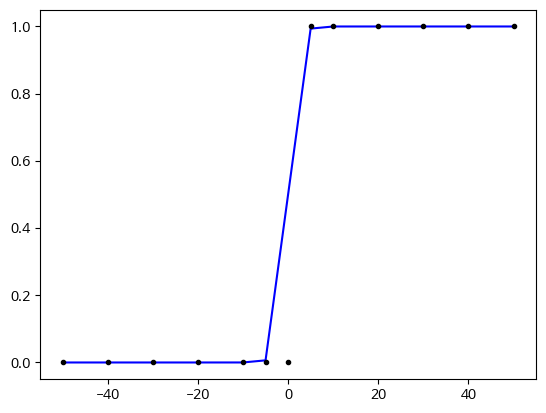

In [43]:
plt.plot( X, model.predict( X ), 'b', X, y, 'k.' )

# 다중 클래스 분류( Softmax Regression )

## 0. 데이터 준비

* seaborn 제공 dataset
  * https://github.com/mwaskom/seaborn-data

In [47]:
# seaborn에서 제공하는 데이터 셋중 iris 데이터셋 사용
iris = sns.load_dataset( 'iris' )

In [48]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 1. 데이터 분석

In [50]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
iris[ 'species' ].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
iris[ 'species' ].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

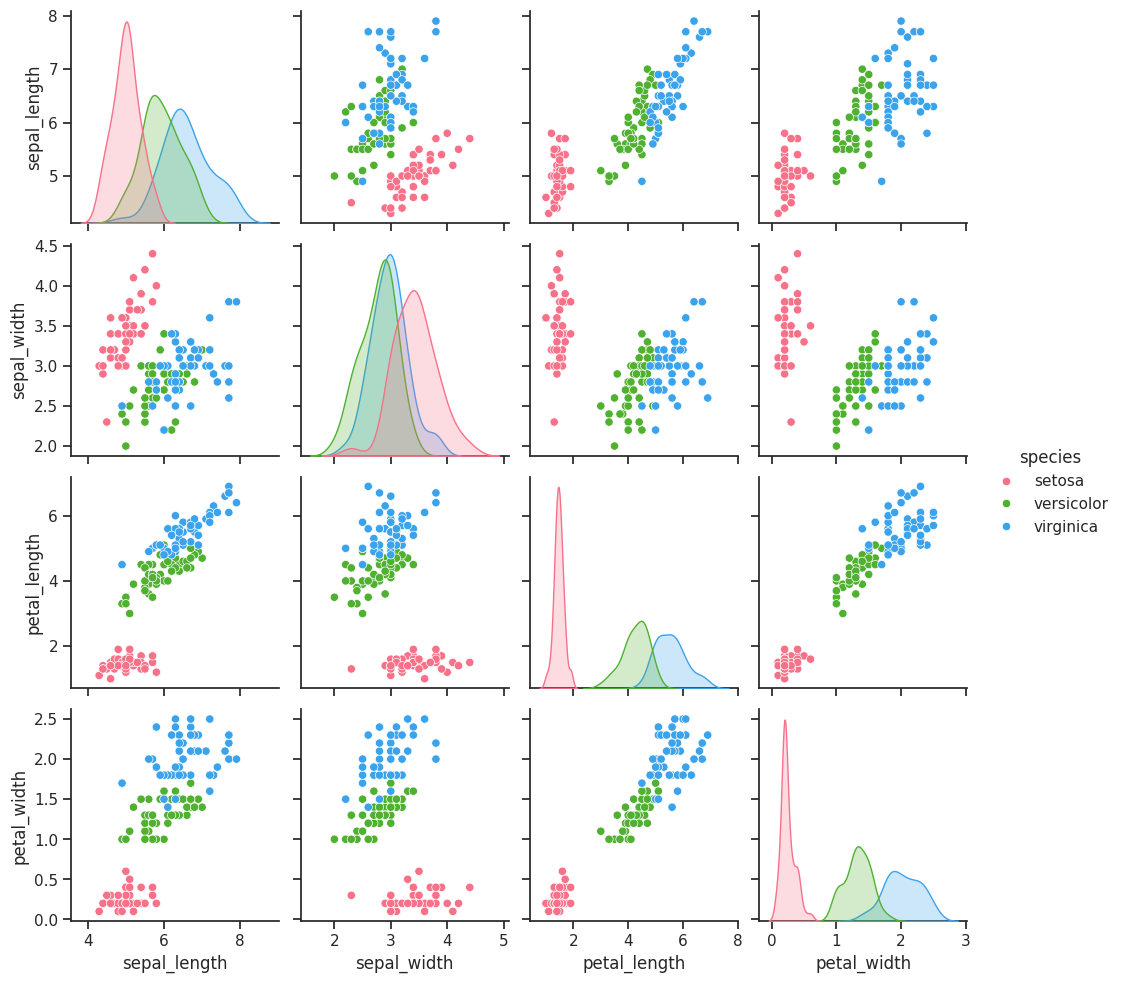

In [55]:
sns.set( style = 'ticks', color_codes = True )
g = sns.pairplot( iris, hue = 'species', palette = 'husl' )

### *데이터 분리

In [56]:
X = iris.iloc[ :, 0:4 ].values # 입력 데이터
y = iris.iloc[ :, 4 ].values # 정답 데이터

In [57]:
print( f'X.shape : {X.shape}' )
print( f'y.shape : {y.shape}' )

X.shape : (150, 4)
y.shape : (150,)


In [58]:
y[ 0 ]

'setosa'

### *정답 데이터를 숫자형으로 변환

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() # 정수 인코딩 객체 생성
y_encoder = encoder.fit_transform( y ) # 문자열을 정수로 encoding

In [64]:
y_encoder[ 0 ], y_encoder[ 50 ], y_encoder[ 100 ]

(0, 1, 2)

### *정답 데이터 One-hot encoding

In [62]:
y = tf.keras.utils.to_categorical( y_encoder ) # One-hot encoding 수행 함수

In [63]:
y[ :5 ], y[ 50:55 ], y[ 100:105 ]

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.]]),
 array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]]),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]))

### *데이터 분리

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [66]:
print( f'X_train.shape : {X_train.shape}' )
print( f'y_train.shape : {y_train.shape}\n' )
print( f'X_test.shape : {X_test.shape}' )
print( f'y_test.shape : {y_test.shape}' )

X_train.shape : (120, 4)
y_train.shape : (120, 3)

X_test.shape : (30, 4)
y_test.shape : (30, 3)


## 2. 모델링

In [78]:
model = Sequential()
model.add( Input( shape = ( 4, ), name = 'Input' ) )
model.add( Dense( 64, activation = 'relu', name = 'Hidden1' ) )
model.add( Dense( 32, activation = 'relu', name = 'Hidden2' ) )
model.add( Dense( 3, activation = 'softmax', name = 'Output' ) )

In [79]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden1 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

## 3. 모델 컴파일

In [80]:
adam = optimizers.Adam()

model.compile( loss = 'categorical_crossentropy',
               optimizer = adam,
               metrics = [ 'accuracy' ] )

## 4. 훈련

In [81]:
history = model.fit( X_train, y_train, epochs = 100,
                     batch_size = 32,
                     validation_split = 0.2 )

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.3568 - loss: 1.3665 - val_accuracy: 0.2917 - val_loss: 1.1385
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3581 - loss: 1.1325 - val_accuracy: 0.7917 - val_loss: 0.9371
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5495 - loss: 1.0261 - val_accuracy: 0.5833 - val_loss: 0.8570
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3568 - loss: 0.9659 - val_accuracy: 0.5833 - val_loss: 0.8234
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3750 - loss: 0.9073 - val_accuracy: 0.8333 - val_loss: 0.8078
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7292 - loss: 0.8906 - val_accuracy: 0.8333 - val_loss: 0.7998
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7891 - loss: 0.8478 - val_accuracy: 0.9583 - val_loss: 0.7794
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8516 - loss: 0.8095 - val_accuracy: 0.9583 - val_loss

### *훈련과정 확인

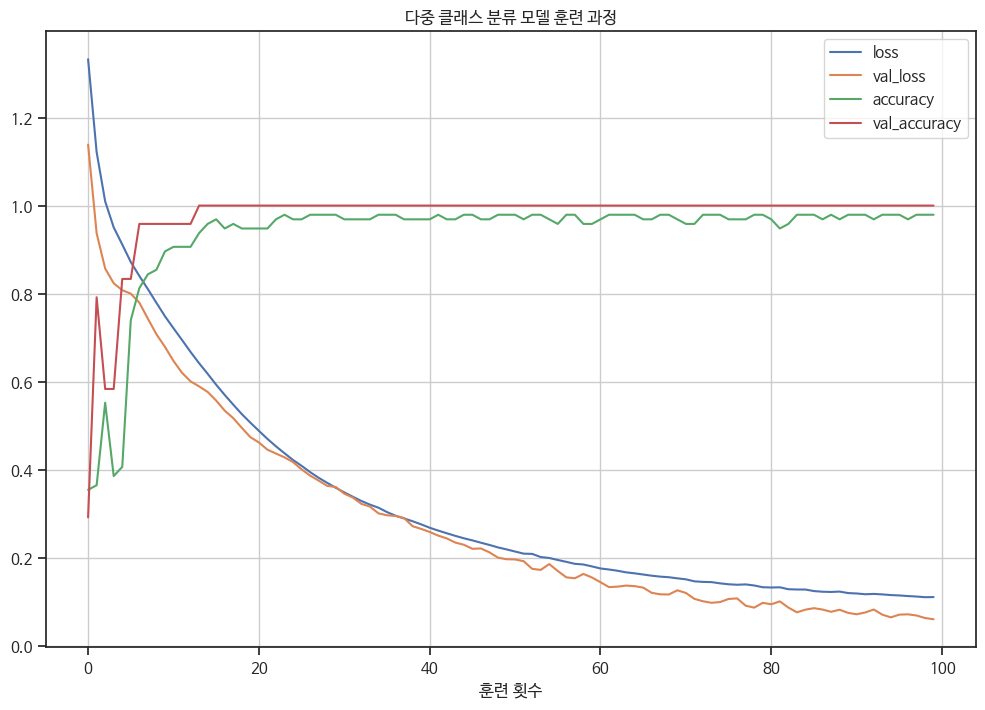

In [82]:
plt.figure( figsize = ( 12, 8 ) )

plt.plot( history.history[ 'loss' ] )
plt.plot( history.history[ 'val_loss' ] )
plt.plot( history.history[ 'accuracy' ] )
plt.plot( history.history[ 'val_accuracy' ] )
plt.title( '다중 클래스 분류 모델 훈련 과정' )
plt.xlabel( '훈련 횟수' )
plt.legend( [ 'loss', 'val_loss', 'accuracy', 'val_accuracy' ] )
plt.grid()

plt.show()

## 5. 평가

In [83]:
loss, accuracy = model.evaluate( X_test, y_test, verbose = 0 )

print( f'loss : {loss:.2f}' )
print( f'accuracy : {accuracy:.2f}' )

loss : 0.13
accuracy : 1.00


## 6. 예측

In [84]:
y_pred = model.predict( X_test ) # 테스트 입력 데이터를 이용한 예측

y_test_class = np.argmax( y_test, axis = 1 ) # 테스터 정답 데이터에 대한 클래스 추출
y_pred_class = np.argmax( y_pred, axis = 1 ) # 예측 결과 데이터에 대한 클래스 추출

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [85]:
y_test_class # 정답

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [86]:
y_pred_class # AI 모델이 예측한 값

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [87]:
test_set = np.array( [ [ 5, 2.9, 1, 0.2 ] ] )
test_set_class = model.predict( test_set )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [88]:
test_set_class

array([[9.9422568e-01, 5.7740519e-03, 2.1345807e-07]], dtype=float32)

In [89]:
print( f'{test_set}에 대한 품종 : {iris[ 'species' ].unique()[ np.argmax( test_set_class, axis = 1 ) ] }' )

[[5.  2.9 1.  0.2]]에 대한 품종 : ['setosa']
